# BATADAL - Comparison Task

The BATtle of the Attack Detection ALgorithms (BATADAL) data is the hourly historical supervisory control and data acquisition (SCADA) operations of the C-Town water distribution system ([R. Taormina et al, 2018](http://dx.doi.org/10.1061/(ASCE)WR.1943-5452.0000969)).

The purpose of this comparison task is to compare the performance of the PCA method with the ARMA and discrete models. Comparing anomaly detection methods is not straightforward, and different research studies frequently use different measures. This can be done by either:

- test point-wise precision and recall, or
- overlap-based false and true positives, or/and
- count a true positive if it detects at least one anomaly in an anomalous region, or
- compare the top-k detected anomalies,
- etc.

Describe in a few lines which comparison method you chose for this data and why. Keep in mind that in practice an analyst has to take action on every positive detected, but will not study every detected data point. Do you recommend using PCA, ARMA, or discrete model?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from AnomalyDetectionFunctions import ARMA_detection

In [2]:
# Load dataset
dftrain1 = pd.read_csv('./data/BATADAL_dataset03.csv')
dftrain2 = pd.read_csv('./data/BATADAL_dataset04.csv')
dftest = pd.read_csv('./data/BATADAL_test_dataset.csv')

# Modify string date to timestamp
dftrain1.DATETIME = dftrain1.DATETIME.apply(lambda s: pd.to_datetime(s, format = '%d/%m/%y %H'))
dftrain2.DATETIME = dftrain2.DATETIME.apply(lambda s: pd.to_datetime(s, format = '%d/%m/%y %H'))
dftest.DATETIME = dftest.DATETIME.apply(lambda s: pd.to_datetime(s, format = '%d/%m/%y %H'))

# Remove the spaces in column names
dftrain2.columns = dftrain2.columns.str.strip()

# Set timestamp as index
dftrain1.set_index('DATETIME', inplace = True)
dftrain2.set_index('DATETIME', inplace = True)
dftest.set_index('DATETIME', inplace = True)

## ARMA

### Water level of tank T2

In [3]:
# initialize the function
tank_T2 = ARMA_detection(dftrain1, dftest, signal = 'L_T2')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


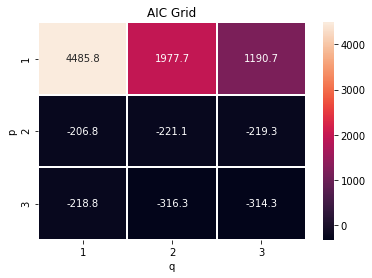

In [4]:
# check the order of ARMA model
tank_T2.aic_heatmap(ps = range(1,4), qs = range(1,4))

In [ ]:
tank_T2.arma_train_predict(p=2, q=1, stepsize=500, learninghr = 240, tolfactor=1)

In [6]:
# check the anomalies detected
tank_T2.anomalies

[Timestamp('2017-01-23 15:00:00'),
 Timestamp('2017-02-13 15:00:00'),
 Timestamp('2017-03-01 14:00:00'),
 Timestamp('2017-03-22 01:00:00'),
 Timestamp('2017-03-30 14:00:00')]

In [ ]:
# compute and plot the residuals
tank_T2.compute_residuals()

## Discrete (SAX)

## PCA